# Classification of Image Data with Multilayer Perceptrons and Convolutional Neural Networks

## Installations

In [1]:
import medmnist
import torch
import math
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.nn.functional import one_hot
from medmnist import INFO, Evaluator
import numpy as np
print(medmnist.__version__)

3.0.2


## Task 1: Acquire the data / Investigate data

We utilize pytorch for the convienent dataloader format, as described in: 
    https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb   

NOTE: We must pre-process labels to be OHE

In [2]:
data_flag = 'organamnist'
download = True


info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [3]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0], std = [1])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

train_loader = data.DataLoader(dataset = train_dataset, batch_size= 64, shuffle = True)
test_loader = data.DataLoader(dataset = test_dataset, batch_size=64, shuffle=True)

Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz
Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz
Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz


In [4]:
print(train_dataset)
print("===================")
print(test_dataset)

Dataset OrganAMNIST of size 28 (organamnist)
    Number of datapoints: 34561
    Root location: /home/sebastiancsabry/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'bladder', '1': 'femur-left', '2': 'femur-right', '3': 'heart', '4': 'kidney-left', '5': 'kidney-right', '6': 'liver', '7': 'lung-left', '8': 'lung-right', '9': 'pancreas', '10': 'spleen'}
    Number of samples: {'train': 34561, 'val': 6491, 'test': 17778}
    Description: The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1×28×28 to p

An example visulization:

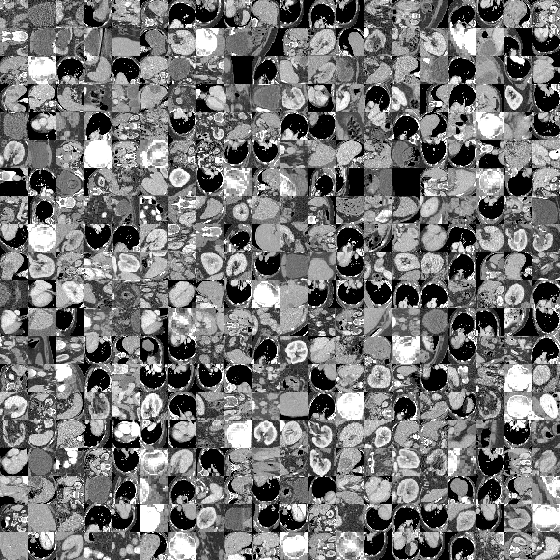

In [5]:
# montage
train_dataset.montage(length=20)

In [12]:
#Is this a correct intepretation?
print("Size of dataset: " + str(len(train_dataset)))
print("Size of vector: " + str(len(train_dataset[0])))
print("Channels: " + str(len(train_dataset[0][0])))
print("Matrix width: " + str(len(train_dataset[0][0][0][0])))
print("Matrix height: " + str(len(train_dataset[0][0][0])))

Size of dataset: 34561
Size of vector: 2
Channels: 1
Matrix width: 28
Matrix height: 28


In [13]:
for images, labels in train_loader:
    # `images` is a batch of image tensors
    # `labels` is a batch of corresponding labels
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")
    break  # Process just one batch for demonstration

Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64, 1])


In [14]:
for images, labels in train_loader:
    for i in range(len(images)):
        # Extract individual datapoint
        datapoint = images[i]  # Shape: (1, 28, 28)
        label = labels[i]      # Scalar

        # Extract channels and image matrix
        channel = datapoint.shape[0]  # Should be 1 for grayscale
        image_matrix = datapoint[0]  # Shape: (28, 28), since only one channel
        
        print(f"Datapoint shape: {datapoint.shape}")
        print(f"Channel: {channel}")
        print(f"Image Matrix shape: {image_matrix.shape}")
        print(f"Label: {label}")
        print(f"Images:{len(images)}")
        break  # Process just one image for demonstration
    break

Datapoint shape: torch.Size([1, 28, 28])
Channel: 1
Image Matrix shape: torch.Size([28, 28])
Label: tensor([7])
Images:64


# Task 2: Implement a Multilayer Perceptron

# Task 3: 1.

In [9]:
from mlp import MLPSoftmax, ActivationFunction,  ReLU, ReLU_derivative, random_initalizer, random_optimized_initalizer

## (1) MLP with no hidden layers.

In [10]:
mlp_no_hidden_layers = MLPSoftmax(initalizer=random_initalizer, activation_function=None, layer_sizes=[784, 11]) #We know the dimensions from torch.flatten()

In [ ]:
loss_array_train = []
for images, labels in train_loader:
        flattened_images  =  torch.flatten(images, start_dim=1)
        X = flattened_images.numpy().astype(np.float16)

        ohe_labels = one_hot(labels, num_classes=11)
        ohe_labels = ohe_labels.squeeze()
        y = ohe_labels.numpy().astype(np.int8)

        mlp_no_hidden_layers.fit(X = X, y = y, learning_rate=-0.01, epochs = 100, batch = 32, termination_condition = 1e-2, max_iters = 1000)
        loss_array_train.append(mlp_no_hidden_layers.predict(X,y)[0])
        #print(f"Loss:{mlp_no_hidden_layers.predict(X, y):.4f}") 
        break

final_loss = np.sum(loss_array_train) / len(loss_array_train)
print(f"Final Train Loss, No Hidden Layers: {final_loss:.4f}")

Final Train Loss, No Hidden Layers: 17.8450


In [12]:
loss_array_test = []
for images, labels in test_loader:
        flattened_images  =  torch.flatten(images, start_dim=1)
        X = flattened_images.numpy().astype(np.float16)

        ohe_labels = one_hot(labels, num_classes=11)
        ohe_labels = ohe_labels.squeeze()
        y = ohe_labels.numpy().astype(np.int8)

        #No Fit is called
        loss_array_test.append(mlp_no_hidden_layers.predict(X,y)[0])
        #print(f"Loss:{mlp_no_hidden_layers.predict(X, y):.4f}") 

final_loss = np.sum(loss_array_train) / len(loss_array_train)
print(f"Final Test Loss, No Hidden Layers: {final_loss:.4f}")

Final Test Loss, No Hidden Layers: 17.8450


## (2) MLP with single layer (256 Units) and Relu activation.

In [ ]:
#Initalization:
activation_function_relu = ActivationFunction(func = ReLU, derivative= ReLU_derivative)
mlp_1_hidden_layers_relu = MLPSoftmax(initalizer=random_optimized_initalizer, activation_function= activation_function_relu, layer_sizes=[784, 256, 11]) #We know the dimensions from torch.flatten()
#Training
loss_array_train = []
for images, labels in train_loader:
        flattened_images  =  torch.flatten(images, start_dim=1)
        X = flattened_images.numpy().astype(np.float16)

        ohe_labels = one_hot(labels, num_classes=11)
        ohe_labels = ohe_labels.squeeze()
        y = ohe_labels.numpy().astype(np.int8)

        mlp_1_hidden_layers_relu.fit(X = X, y = y, learning_rate=-0.001, epochs = 100, batch = 32, termination_condition = 1e-2, max_iters = 100)
        loss_array_train.append(mlp_1_hidden_layers_relu.predict(X,y)[0])

final_loss = np.sum(loss_array_train) / len(loss_array_train)
print(f"Final Train Loss, No Hidden Layers: {final_loss:.4f}")

KeyboardInterrupt: 

## (3) MLP with two hidden units (256, 256) and Relu activation. 

In [ ]:
#Initalization:
activation_function_relu = ActivationFunction(func = ReLU, derivative= ReLU_derivative)
mlp_2_hidden_layers_relu = MLPSoftmax(initalizer=random_optimized_initalizer, activation_function= activation_function_relu, layer_sizes=[784, 256, 256, 11]) #We know the dimensions from torch.flatten()
#Training
loss_array_train = []
for images, labels in train_loader:
        flattened_images  =  torch.flatten(images, start_dim=1)
        X = flattened_images.numpy().astype(np.float16)

        ohe_labels = one_hot(labels, num_classes=11)
        ohe_labels = ohe_labels.squeeze()
        y = ohe_labels.numpy().astype(np.int8)

        mlp_2_hidden_layers_relu.fit(X = X, y = y, learning_rate=-0.001, epochs = 100, batch = 32, termination_condition = 1e-2, max_iters = 100)
        loss_array_train.append(mlp_2_hidden_layers_relu.predict(X,y)[0])

final_loss = np.sum(loss_array_train) / len(loss_array_train)
print(f"Final Train Loss, No Hidden Layers: {final_loss:.4f}")